# Monte Carlo's method #

The **Monte Carlo's method** is a numerical method to solve defined integrals that are impossible (or almost impossible) to solve analytically, being based on the generation of random points. 

To apply this method we need a know area $A_{known}$ that encompasses the area $A$ that we want to calculate (that is, the value of the defined integral), how a rectangle. Knowing this area $A_{know}$ we generate $n$ random points inside it and count the number of points that were generated inside the desired area $A$ ($n_{inside}$), did this, the desired area will be giving by:

$$A\approx A_{known} \frac{n_{inside}}{n}$$

### Example ###

For example, let's solve the following integral utilizing the Monte Carlo's method:

$$\int_{0}^{1} x^{-x} dx$$

Max value of the curve: 1.444659048513268
Min value of the curve: 1.0


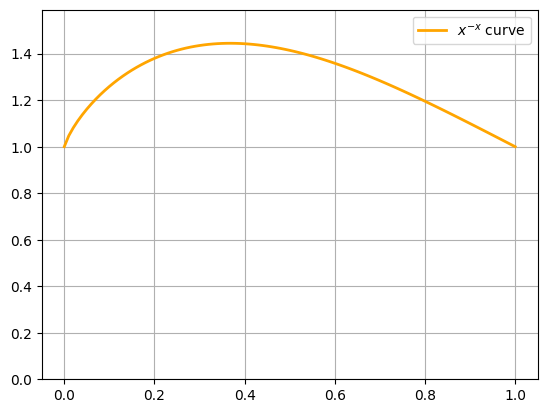

In [1]:
# First: Visualizing the function:

import numpy as np
import matplotlib.pyplot as plt

d = 101 # Number of points for x axis discretization
n = 3000 #Number of points for Monte Carlo's method

def random_points(x_min,x_max,y_min,y_max, numer_of_points, n_discretization = 101): # Function to generate random points
    x_coordenates = []
    y_coordenates = []
    x_function_interval = np.linspace(x_min, x_max, n_discretization)
    for i in range(0,numer_of_points,1):
        x = np.random.choice(x_function_interval)
        y = np.random.uniform(y_min,y_max)
        x_coordenates.append(x)
        y_coordenates.append(y)
    return (np.array(x_coordenates), np.array(y_coordenates))

def f(x): # Integraded function
    return np.power(x,-x)

x_interval = np.linspace(0,1,d) # Integration interval
function_curve = f(x_interval) # Curve in this interval
max_curve_value = np.max(function_curve)
min_curve_value = np.min(function_curve)

plt.plot(x_interval, function_curve, label = r'$x^{-x}$ curve', color = 'orange', linewidth = 2)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,1.1*max_curve_value)
print(f'Max value of the curve: {max_curve_value}')
print(f'Min value of the curve: {min_curve_value}')
plt.show()

Red - Points inside the area (number: 2692).
Blue - Points outside the area (number: 308).

Approximate area by Monte Carlo's method: 1.2963407195325725 a.u. (number of points: 3000).


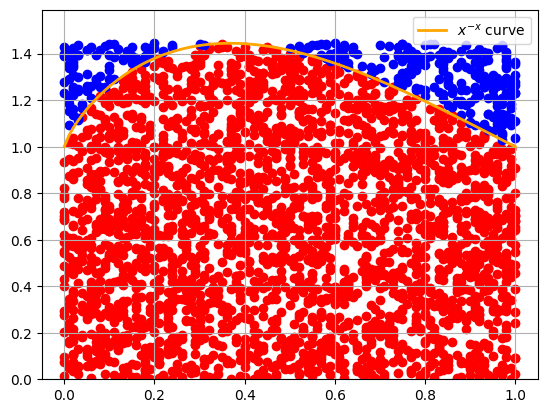

In [2]:
# Applying the Monte Carlo's method:

x_coordenates, y_coordenates = random_points(x_interval[0],x_interval[-1],0,max_curve_value,n, d)

# Find the points inside and outside the area:

n_inside = 0
n_outside = 0

x_inside = []
y_inside = []
x_outside = []
y_outside = []

for i in range(0,n, 1):
    x_i = np.where(x_interval == x_coordenates[i])[0][0]
    if y_coordenates[i] < function_curve[x_i]:
        x_inside.append(x_coordenates[i])
        y_inside.append(y_coordenates[i])
        n_inside += 1
    else:
        x_outside.append(x_coordenates[i])
        y_outside.append(y_coordenates[i])
        n_outside += 1

# Calculating the approximate area and ploting the graph:

A_know = (x_interval[-1]-x_interval[0]) * max_curve_value
A = A_know * n_inside/n # n = n_inside + n_outside

x_inside = np.array(x_inside)
x_outside = np.array(x_outside)
y_inside = np.array(y_inside)
y_outside = np.array(y_outside)

plt.plot(x_interval, function_curve, label = r'$x^{-x}$ curve', color = 'orange', linewidth = 2)
plt.scatter(x_inside, y_inside, color = 'red')
plt.scatter(x_outside, y_outside, color = 'blue')
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,1.1*max_curve_value)
print(f'\033[31mRed - Points inside the area (number: {n_inside}).')
print(f'\033[34mBlue - Points outside the area (number: {n_outside}).\033[0m')
print(f"\n\033[1mApproximate area by Monte Carlo's method: {A} a.u. (number of points: {n}).\033[0m")
plt.show()